# Spotify Song Data Analysis
## Introduction
This is my capstone 2, spotify song database
## Importing Libraries

In [39]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
plt.style.use('ggplot');
import sklearn as sk;
import seaborn as sns;


## Reading the dataset

In [10]:
df = pd.read_csv('data\data.csv'); # Main dataset - Row is song
dfArtist = pd.read_csv('data\data_by_artist.csv'); # Row is artist
dfGenre = pd.read_csv('data\data_by_genres.csv'); # Row is genre
dfYear = pd.read_csv('data\data_by_year.csv'); # Row is year
dfWGenres = pd.read_csv('data\data_w_genres.csv'); # Row is artist

## Understanding the Categories
### Content
The "data.csv" file contains more than 170.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the other datasets.

### Primary:
- id (Id of track generated by Spotify)
### Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
### Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

## First look at the dataset

In [32]:
print(df.info());
print('-' * 100);
print(df.head());
print('-' * 100);
print(df.describe().round(decimals=2));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

There are a total of 170653 songs in the dataset; there are 15 numerical categories and 3 categorical categories (name, artist, release_date)

## Distribution Visualization


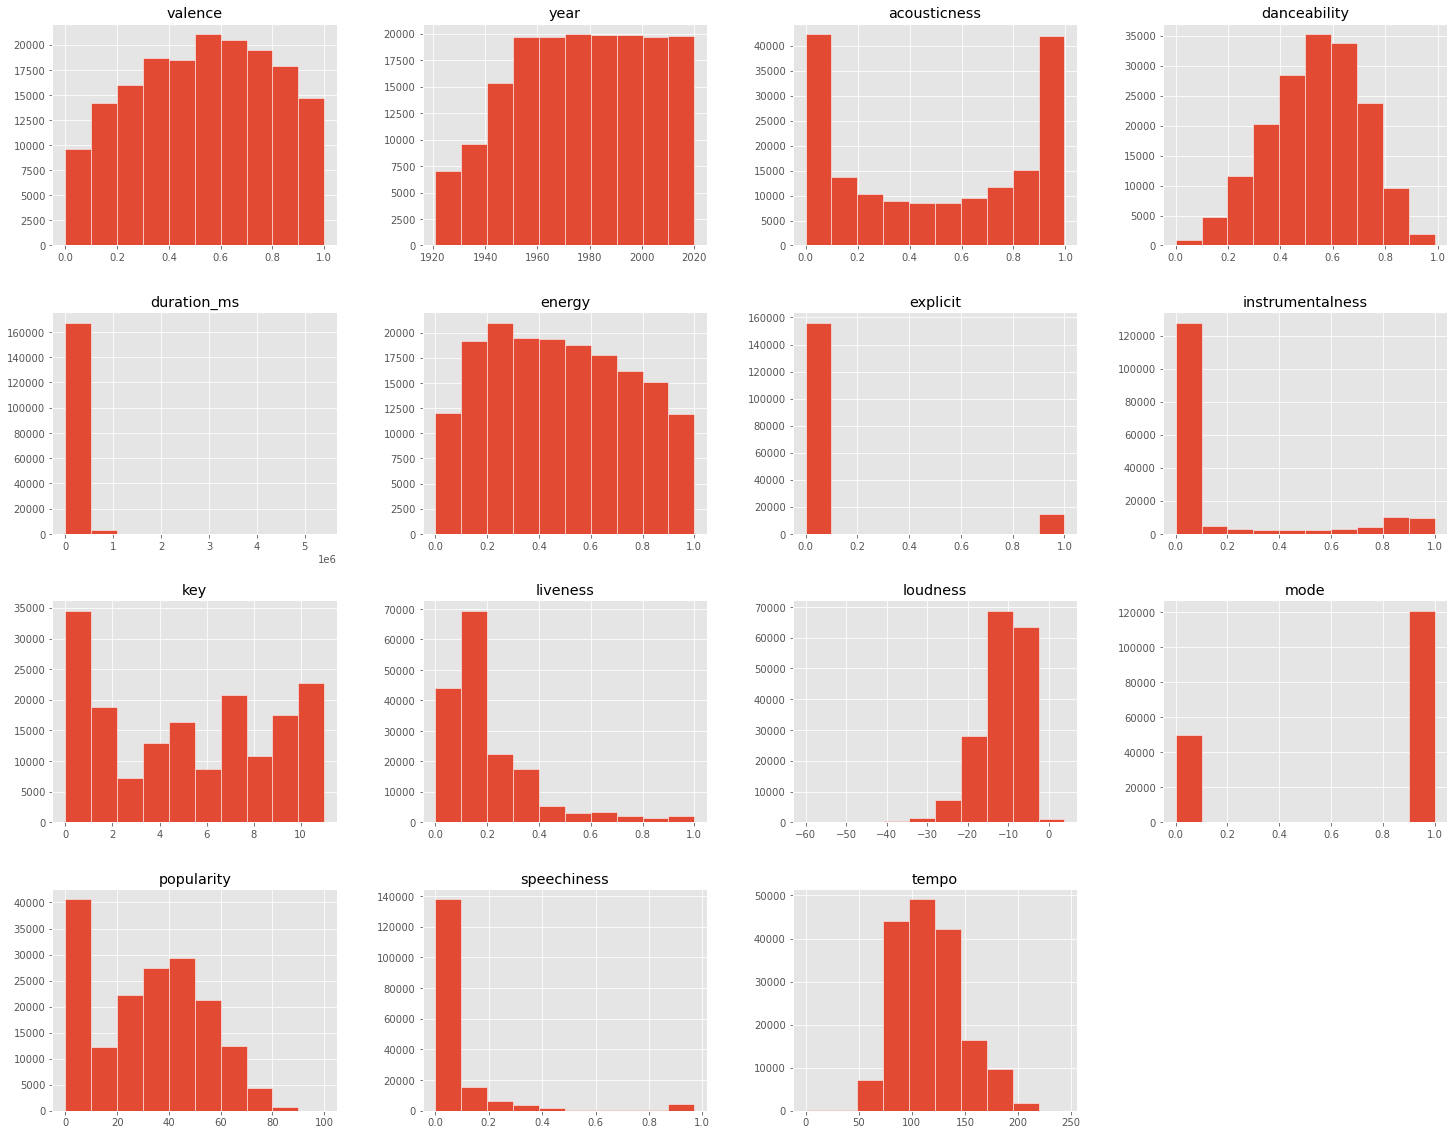

In [37]:
df.hist(figsize=(25,20), edgecolor='#FFFFFF')
plt.show()

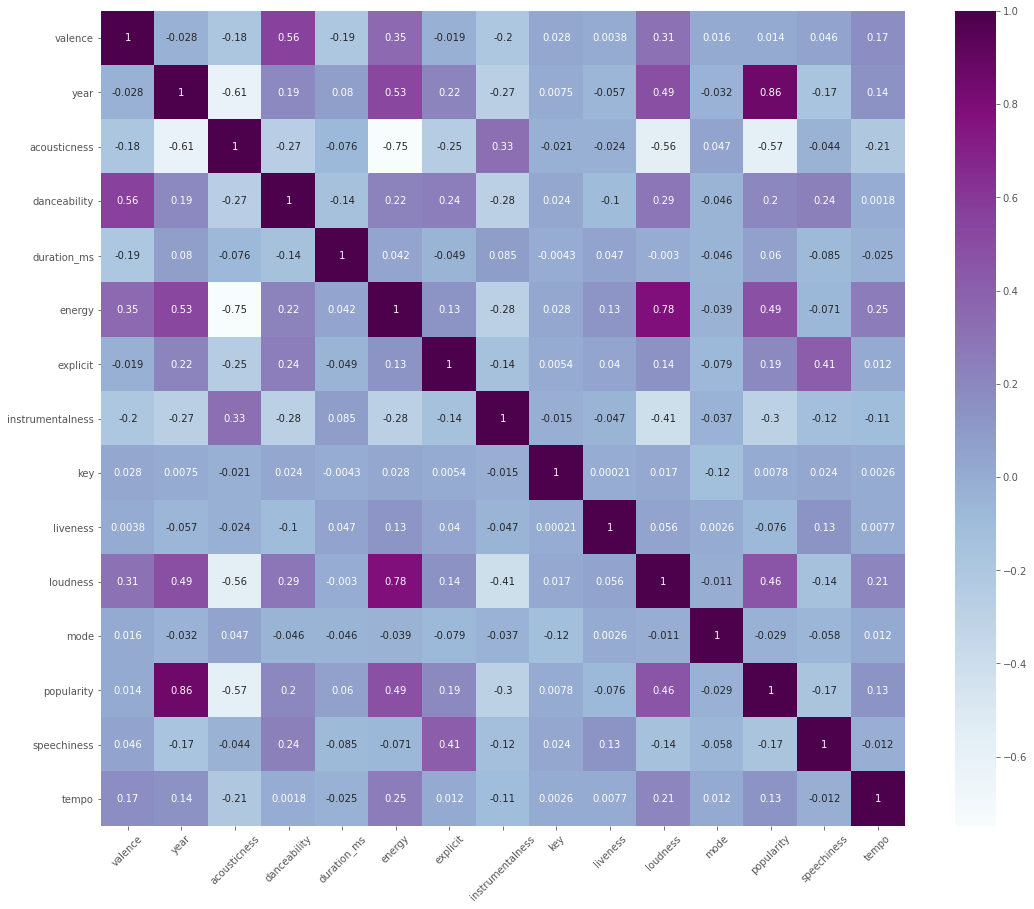

In [70]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(
    df.corr(),
    cmap='BuPu',
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)
plt.show()